# Covid 19 Analysis

In [62]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.preprocessing import StandardScaler

### 1) Dataset parsing and pre-processing
- - -

In [63]:
# load the dataset
df = pd.read_csv('data/covid_19_world.csv', delimiter=',')

In [64]:
# check dataframe
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
30735,NaN,Sao Tome and Principe,0.186360,6.613081,5/16/20,235,7,4
30736,NaN,Yemen,15.552727,48.516388,5/16/20,122,18,1
30737,NaN,Comoros,-11.645500,43.333300,5/16/20,11,1,3
30738,NaN,Tajikistan,38.861034,71.276093,5/16/20,1322,36,0


In [65]:
# check information about dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30740 entries, 0 to 30739
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  9280 non-null   object 
 1   Country/Region  30740 non-null  object 
 2   Lat             30740 non-null  float64
 3   Long            30740 non-null  float64
 4   Date            30740 non-null  object 
 5   Confirmed       30740 non-null  int64  
 6   Deaths          30740 non-null  int64  
 7   Recovered       30740 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [66]:
# observe general statistics of the dataframe
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,30740.000000,30740.000000,3.074000e+04,30740.000000,30740.000000
mean,21.181891,22.881195,4.464725e+03,297.383604,1311.136207
std,24.904277,70.245571,4.057051e+04,2811.876832,9658.594359
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,1.800000e+01,0.000000,1.000000
75%,41.153300,78.000000,3.930000e+02,5.000000,90.000000
max,71.706900,178.065000,1.467820e+06,88754.000000,268376.000000


In [67]:
# check data types of each attribute
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [68]:
# convert date column to datetime, and recovered back to int
df["Date"] = pd.to_datetime(df["Date"])

In [69]:
# observation of the data types again
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [70]:
# calculate number of days since the beginning (checking for missing rows/dates)
first_day = df["Date"].min()
last_day = df["Date"].max()
total_days = len(pd.date_range(start=first_day, end=last_day))
total_days

116

In [71]:
# check the different dates the dataset has
len(df["Date"].unique())

116

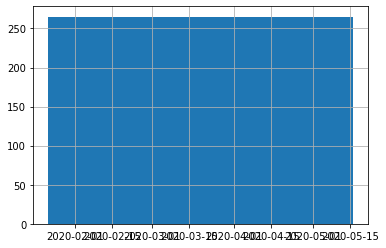

In [72]:
# creating histogram to check if any dates are missing for any country/state
df["Date"].hist(bins=len(df["Date"].unique()))

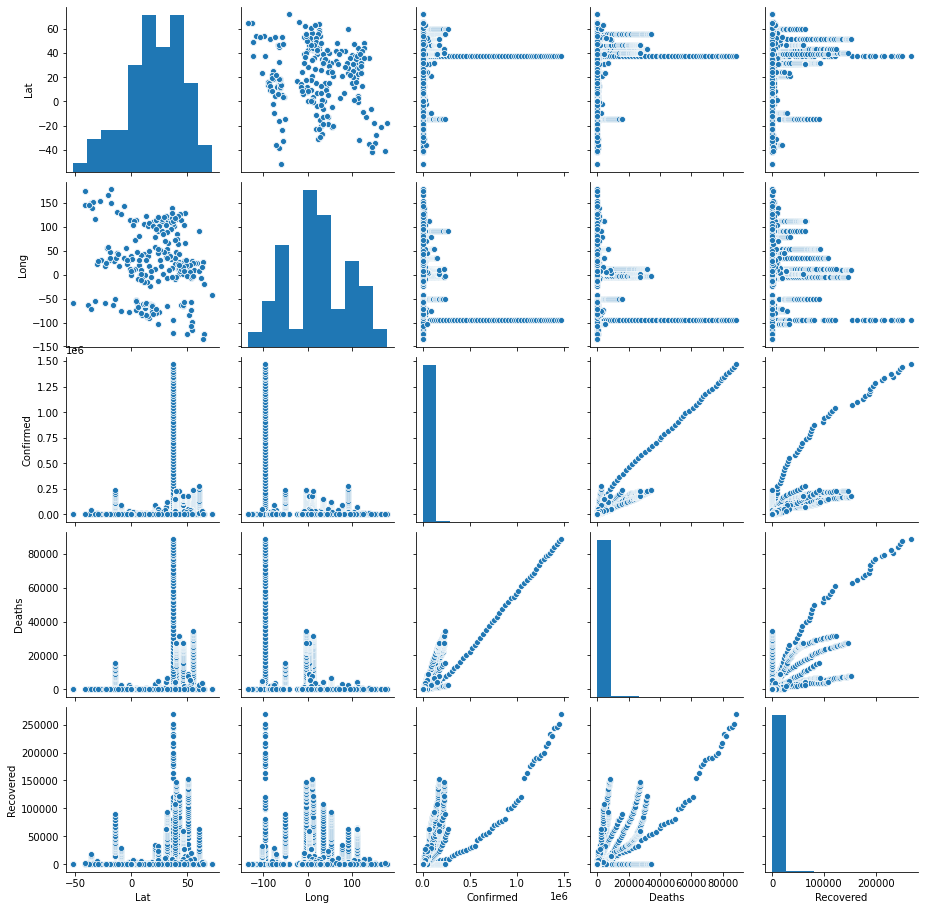

In [73]:
# compute a pairplot in order to observe the distribution of the attributes and scatter plots
sb.pairplot(df)

In [74]:
# check for missing values (null values)
df.loc[df['Date'].isnull() |
      df['Confirmed'].isnull() |
      df['Deaths'].isnull() |
      df['Recovered'].isnull() |
      df['Lat'].isnull() |
      df['Long'].isnull()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered


In [75]:
# check missing values more generally (null values)
df.isnull().sum()

Province/State    21460
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [76]:
# check for missing values (NA values)
df.loc[df['Date'].isna() |
      df['Confirmed'].isna() |
      df['Deaths'].isna() |
      df['Recovered'].isna() |
      df['Lat'].isna() |
      df['Long'].isna()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered


In [77]:
# check missing values more generally (NA values)
df.isna().sum()

Province/State    21460
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [78]:
# determine countries with only states data and countries with both states and total data
def diff(first, second):
    second = set(second)
    return [item for item in first if item not in second]

countries_with_states = df.loc[df['Province/State'].notna(), 'Country/Region'].unique()

countries_with_states_and_total = []
for country in countries_with_states:
    states_data = df.loc[(df['Country/Region'] == country) & df['Province/State'].isna()]
    if(len(states_data) > 0):
        countries_with_states_and_total.append(country)

countries_with_states_only = diff(countries_with_states, countries_with_states_and_total)
print("States only: ", end="")
print(countries_with_states_only)
print("States and Total: ", end="")
print(countries_with_states_and_total)

States only: ['Australia', 'Canada', 'China']
States and Total: ['Denmark', 'France', 'Netherlands', 'United Kingdom']


In [79]:
# for countries with states data and total data, separate the states and make them independent regions
for country in countries_with_states_and_total:
    country_states_info = df[(df['Country/Region'] == country) & df['Province/State'].notna()]
    df = df.drop(df[(df['Country/Region'] == country) & df['Province/State'].notna()].index)
    country_states_info["Country/Region"] = country_states_info["Province/State"]
    country_states_info["Province/State"] = np.NaN
    df = pd.concat([df, country_states_info], ignore_index=True)
    
df

/home/mike/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/mike/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
30735,NaN,Montserrat,16.7425,-62.1874,2020-05-16,11,1,10
30736,NaN,Anguilla,18.2206,-63.0686,2020-05-16,3,0,3
30737,NaN,British Virgin Islands,18.4207,-64.6400,2020-05-16,8,1,6
30738,NaN,Turks and Caicos Islands,21.6940,-71.7979,2020-05-16,12,1,10


In [80]:
# for the countries that only have states information, the approach could be different, depending on the distribution of the geographical values.

# check the min and max values for longitude and latitude, for every China province/state
china_df = df.loc[(df["Country/Region"] == "China") & (df["Date"] == "2020-01-22")]
print("Min latitude in China: {}".format(china_df["Lat"].min()))
print("Max latitude in China: {}".format(china_df["Lat"].max()))
print("Min longitude in China: {}".format(china_df["Long"].min()))
print("Max longitude in China: {}".format(china_df["Long"].max()))

# because the difference is quite large (China is a big country), use its provinces as separate "countries"/regions
china_df = df[df['Country/Region'] == "China"]
df = df.drop(df[(df['Country/Region'] == "China") & df['Province/State'].notna()].index)
china_df["Country/Region"] = (china_df["Province/State"] + " (China)")
china_df["Province/State"] = np.NaN
df = pd.concat([df, china_df], ignore_index=True)
china_df

Min latitude in China: 19.1959
Max latitude in China: 47.862
Min longitude in China: 85.2401
Max longitude in China: 127.7615


/home/mike/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/mike/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
49,NaN,Anhui (China),31.8257,117.2264,2020-01-22,1,0,0
50,NaN,Beijing (China),40.1824,116.4142,2020-01-22,14,0,0
51,NaN,Chongqing (China),30.0572,107.8740,2020-01-22,6,0,0
52,NaN,Fujian (China),26.0789,117.9874,2020-01-22,1,0,0
53,NaN,Gansu (China),37.8099,101.0583,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
27677,NaN,Tianjin (China),39.3054,117.3230,2020-05-16,192,3,187
27678,NaN,Tibet (China),31.6927,88.0924,2020-05-16,1,0,1
27679,NaN,Xinjiang (China),41.1129,85.2401,2020-05-16,76,3,73
27680,NaN,Yunnan (China),24.9740,101.4870,2020-05-16,185,2,183


In [81]:
# check the min and max values for longitude and latitude, for every Australia province/state
aus_df = df.loc[(df["Country/Region"] == "Australia") & (df["Date"] == "2020-01-22")]
print("Min latitude in Australia: {}".format(aus_df["Lat"].min()))
print("Max latitude in Australia: {}".format(aus_df["Lat"].max()))
print("Min longitude in Australia: {}".format(aus_df["Long"].min()))
print("Max longitude in Australia: {}".format(aus_df["Long"].max()))

# use its provinces as separate "countries"/regions
aus_df = df[df['Country/Region'] == "Australia"]
df = df.drop(df[(df['Country/Region'] == "Australia") & df['Province/State'].notna()].index)
aus_df["Country/Region"] = (aus_df["Province/State"] + " (Australia)")
aus_df["Province/State"] = np.NaN
df = pd.concat([df, aus_df], ignore_index=True)
aus_df

Min latitude in Australia: -41.4545
Max latitude in Australia: -12.4634
Min longitude in Australia: 115.8605
Max longitude in Australia: 153.4


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
8,NaN,Australian Capital Territory (Australia),-35.4735,149.0124,2020-01-22,0,0,0
9,NaN,New South Wales (Australia),-33.8688,151.2093,2020-01-22,0,0,0
10,NaN,Northern Territory (Australia),-12.4634,130.8456,2020-01-22,0,0,0
11,NaN,Queensland (Australia),-28.0167,153.4000,2020-01-22,0,0,0
12,NaN,South Australia (Australia),-34.9285,138.6007,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
23816,NaN,Queensland (Australia),-28.0167,153.4000,2020-05-16,1055,6,1037
23817,NaN,South Australia (Australia),-34.9285,138.6007,2020-05-16,439,4,435
23818,NaN,Tasmania (Australia),-41.4545,145.9707,2020-05-16,228,13,192
23819,NaN,Victoria (Australia),-37.8136,144.9631,2020-05-16,1558,18,1417


In [82]:
# remove Diamond Princess entry from dataset
df = df.drop(df[df['Province/State'] == "Diamond Princess"].index)

# check the min and max values for longitude and latitude, for every Canada province/state
can_df = df.loc[(df["Country/Region"] == "Canada") & (df["Date"] == "2020-01-22")]
print("Min latitude in Canada: {}".format(can_df["Lat"].min()))
print("Max latitude in Canada: {}".format(can_df["Lat"].max()))
print("Min longitude in Canada: {}".format(can_df["Long"].min()))
print("Max longitude in Canada: {}".format(can_df["Long"].max()))

# use its provinces as separate "countries"/regions
can_df = df[df['Country/Region'] == "Canada"]
df = df.drop(df[(df['Country/Region'] == "Canada") & df['Province/State'].notna()].index)
can_df["Country/Region"] = (can_df["Province/State"] + " (Canada)")
can_df["Province/State"] = np.NaN
df = pd.concat([df, can_df], ignore_index=True)
can_df

Min latitude in Canada: 37.6489
Max latitude in Canada: 64.8255
Min longitude in Canada: -135.0
Max longitude in Canada: -57.6604


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
27,NaN,Alberta (Canada),53.9333,-116.5765,2020-01-22,0,0,0
28,NaN,British Columbia (Canada),49.2827,-123.1207,2020-01-22,0,0,0
29,NaN,Grand Princess (Canada),37.6489,-122.6655,2020-01-22,0,0,0
30,NaN,Manitoba (Canada),53.7609,-98.8139,2020-01-22,0,0,0
31,NaN,New Brunswick (Canada),46.5653,-66.4619,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
22920,NaN,Prince Edward Island (Canada),46.5107,-63.4168,2020-05-16,27,0,0
22921,NaN,Quebec (Canada),52.9399,-73.5491,2020-05-16,42192,3484,0
22922,NaN,Saskatchewan (Canada),52.9399,-106.4509,2020-05-16,591,7,0
23068,NaN,Northwest Territories (Canada),64.8255,-124.8457,2020-05-16,5,0,0


In [83]:
# delete province/state (not used anymore), and sort the values
del df["Province/State"]
df.sort_values(by=['Date', 'Country/Region'], inplace=True)
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
29116,Alberta (Canada),53.9333,-116.5765,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
...,...,...,...,...,...,...,...
30623,Yukon (Canada),64.2823,-135.0000,2020-05-16,11,0,0
28186,Yunnan (China),24.9740,101.4870,2020-05-16,185,2,183
21432,Zambia,-15.4167,28.2833,2020-05-16,679,7,183
28187,Zhejiang (China),29.1832,120.0934,2020-05-16,1268,1,1267


**NOTE:** It has been noted that the recovered Covid-19 cases for the UK, Netherlands and Canada are not available in this dataset. For the prediction/forecast of the Covid-19 recovered cases, that data will not be considered. The UK, Netherlands and Canada information in the dataset will not be deleted because it is still relevant for the prediction of confirmed and death cases.

In [84]:
# check all the recovered cases values that are missing (UK)
df.loc[df["Country/Region"] == "United Kingdom", "Recovered"]

151      0
336      0
521      0
706      0
891      0
        ..
20686    0
20871    0
21056    0
21241    0
21426    0
Name: Recovered, Length: 116, dtype: int64

In [85]:
# convert all those values to NaN, since they are missing
df.loc[df["Country/Region"] == "United Kingdom", "Recovered"] = np.NaN
df.loc[df["Country/Region"] == "United Kingdom", "Recovered"]

151     NaN
336     NaN
521     NaN
706     NaN
891     NaN
         ..
20686   NaN
20871   NaN
21056   NaN
21241   NaN
21426   NaN
Name: Recovered, Length: 116, dtype: float64

In [86]:
# check all the recovered cases values that are missing (Canada)
def get_canada_regions(row):
    if "Canada" in row["Country/Region"]:
        return True
    else:
        return False

m = df.apply(get_canada_regions, axis=1)
df.loc[m, "Recovered"]

29116    0.0
29117    0.0
29118    0.0
29119    0.0
29120    0.0
        ... 
30618    0.0
30619    0.0
30620    0.0
30621    0.0
30623    0.0
Name: Recovered, Length: 1508, dtype: float64

In [87]:
# convert all those values to NaN, since they are missing
df.loc[m, "Recovered"] = np.NaN
df.loc[m, "Recovered"]

29116   NaN
29117   NaN
29118   NaN
29119   NaN
29120   NaN
         ..
30618   NaN
30619   NaN
30620   NaN
30621   NaN
30623   NaN
Name: Recovered, Length: 1508, dtype: float64

In [88]:
# check all the recovered cases values that are missing (Netherlands)
df.loc[df["Country/Region"] == "Netherlands", "Recovered"]

103      0.0
288      0.0
473      0.0
658      0.0
843      0.0
        ... 
20638    0.0
20823    0.0
21008    0.0
21193    0.0
21378    0.0
Name: Recovered, Length: 116, dtype: float64

In [89]:
# convert all those values to NaN, since they are missing
df.loc[df["Country/Region"] == "Netherlands", "Recovered"] = np.NaN
df.loc[df["Country/Region"] == "Netherlands", "Recovered"]

103     NaN
288     NaN
473     NaN
658     NaN
843     NaN
         ..
20638   NaN
20823   NaN
21008   NaN
21193   NaN
21378   NaN
Name: Recovered, Length: 116, dtype: float64

In [90]:
# create a column for the number of days since the starting day
df["Num_days_from_begin"] = (df["Date"] - first_day).dt.days
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Num_days_from_begin
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,0
29116,Alberta (Canada),53.9333,-116.5765,2020-01-22,0,0,NaN,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,0
...,...,...,...,...,...,...,...,...
30623,Yukon (Canada),64.2823,-135.0000,2020-05-16,11,0,NaN,115
28186,Yunnan (China),24.9740,101.4870,2020-05-16,185,2,183.0,115
21432,Zambia,-15.4167,28.2833,2020-05-16,679,7,183.0,115
28187,Zhejiang (China),29.1832,120.0934,2020-05-16,1268,1,1267.0,115


In [91]:
# calculate increases in confirmed, deaths and recovered
def calc_increase_list(in_list):
    out_list = []
    for idx, elem in enumerate(in_list):
        if idx == 0:
            out_list.append(elem)
        else:
            out_list.append(elem - in_list[idx - 1])
    return out_list

# calculates increases the day before for confirmed, deaths and recovered 
# (after having the increases for each day)
def calc_increase_day_before_list(increases_list):
    out_list = []
    for idx, _ in enumerate(increases_list):
        if idx == 0:
            out_list.append(np.NaN)
        else:
            out_list.append(increases_list[idx - 1])
    return out_list

all_regions = df["Country/Region"].unique()

df["Confirmed_inc"] = np.NaN
df["Deaths_inc"] = np.NaN
df["Recovered_inc"] = np.NaN
df["Confirmed_inc_day_before"] = np.NaN
df["Deaths_inc_day_before"] = np.NaN
df["Recovered_inc_day_before"] = np.NaN

df.sort_values(by=['Date', 'Country/Region'], inplace=True)

for region in all_regions:
    region_df = df.loc[df["Country/Region"] == region]
    df.loc[df["Country/Region"] == region, "Confirmed_inc"] = calc_increase_list(region_df["Confirmed"].values)
    df.loc[df["Country/Region"] == region, "Deaths_inc"] = calc_increase_list(region_df["Deaths"].values)
    df.loc[df["Country/Region"] == region, "Recovered_inc"] = calc_increase_list(region_df["Recovered"].values)
    
    region_df = df.loc[df["Country/Region"] == region]
    df.loc[df["Country/Region"] == region, "Confirmed_inc_day_before"] = calc_increase_day_before_list(region_df["Confirmed_inc"].values)
    df.loc[df["Country/Region"] == region, "Deaths_inc_day_before"] = calc_increase_day_before_list(region_df["Deaths_inc"].values)
    df.loc[df["Country/Region"] == region, "Recovered_inc_day_before"] = calc_increase_day_before_list(region_df["Recovered_inc"].values)
    
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Num_days_from_begin,Confirmed_inc,Deaths_inc,Recovered_inc,Confirmed_inc_day_before,Deaths_inc_day_before,Recovered_inc_day_before
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
1,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
29116,Alberta (Canada),53.9333,-116.5765,2020-01-22,0,0,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30623,Yukon (Canada),64.2823,-135.0000,2020-05-16,11,0,NaN,115,0.0,0.0,NaN,0.0,0.0,NaN
28186,Yunnan (China),24.9740,101.4870,2020-05-16,185,2,183.0,115,0.0,0.0,0.0,0.0,0.0,0.0
21432,Zambia,-15.4167,28.2833,2020-05-16,679,7,183.0,115,25.0,0.0,59.0,0.0,0.0,0.0
28187,Zhejiang (China),29.1832,120.0934,2020-05-16,1268,1,1267.0,115,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# in order to normalize the dataset features, use sklearn's standard scaler
scaler = StandardScaler()
df["Num_days_from_begin_norm"] = scaler.fit_transform(df[["Num_days_from_begin"]].values)

scaler = StandardScaler()
df["Lat_norm"] = scaler.fit_transform(df[["Lat"]].values)

scaler = StandardScaler()
df["Long_norm"] = scaler.fit_transform(df[["Long"]].values)

scaler = StandardScaler()
df["Confirmed_inc_norm"] = scaler.fit_transform(df[["Confirmed_inc"]].values)

scaler = StandardScaler()
df["Deaths_inc_norm"] = scaler.fit_transform(df[["Deaths_inc"]].values)

scaler = StandardScaler()
df["Recovered_inc_norm"] = scaler.fit_transform(df[["Recovered_inc"]].values)

scaler = StandardScaler()
df["Confirmed_inc_day_before_norm"] = scaler.fit_transform(df[["Confirmed_inc_day_before"]].values)

scaler = StandardScaler()
df["Deaths_inc_day_before_norm"] = scaler.fit_transform(df[["Deaths_inc_day_before"]].values)

scaler = StandardScaler()
df["Recovered_inc_day_before_norm"] = scaler.fit_transform(df[["Recovered_inc_day_before"]].values)

df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Num_days_from_begin,Confirmed_inc,Deaths_inc,...,Recovered_inc_day_before,Num_days_from_begin_norm,Lat_norm,Long_norm,Confirmed_inc_norm,Deaths_inc_norm,Recovered_inc_norm,Confirmed_inc_day_before_norm,Deaths_inc_day_before_norm,Recovered_inc_day_before_norm
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,0,0.0,0.0,...,NaN,-1.717183,0.471083,0.597360,-0.117725,-0.110666,-0.121130,NaN,NaN,NaN
1,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,0,0.0,0.0,...,NaN,-1.717183,0.798304,-0.039787,-0.117725,-0.110666,-0.121130,NaN,NaN,NaN
29116,Alberta (Canada),53.9333,-116.5765,2020-01-22,0,0,NaN,0,0.0,0.0,...,NaN,-1.717183,1.311212,-1.983201,-0.117725,-0.110666,NaN,NaN,NaN,NaN
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,0,0.0,0.0,...,NaN,-1.717183,0.271776,-0.302833,-0.117725,-0.110666,-0.121130,NaN,NaN,NaN
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,0,0.0,0.0,...,NaN,-1.717183,0.852605,-0.304791,-0.117725,-0.110666,-0.121130,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30623,Yukon (Canada),64.2823,-135.0000,2020-05-16,11,0,NaN,115,0.0,0.0,...,NaN,1.717183,1.726554,-2.245035,-0.117725,-0.110666,NaN,-0.116999,-0.110177,NaN
28186,Yunnan (China),24.9740,101.4870,2020-05-16,185,2,183.0,115,0.0,0.0,...,0.0,1.717183,0.148971,1.115912,-0.117725,-0.110666,-0.121130,-0.116999,-0.110177,-0.121373
21432,Zambia,-15.4167,28.2833,2020-05-16,679,7,183.0,115,25.0,0.0,...,0.0,1.717183,-1.472053,0.075543,-0.098276,-0.110666,0.003578,-0.116999,-0.110177,-0.121373
28187,Zhejiang (China),29.1832,120.0934,2020-05-16,1268,1,1267.0,115,0.0,0.0,...,0.0,1.717183,0.317901,1.380346,-0.117725,-0.110666,-0.121130,-0.116999,-0.110177,-0.121373


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a41412e8>,
      dtype=object)

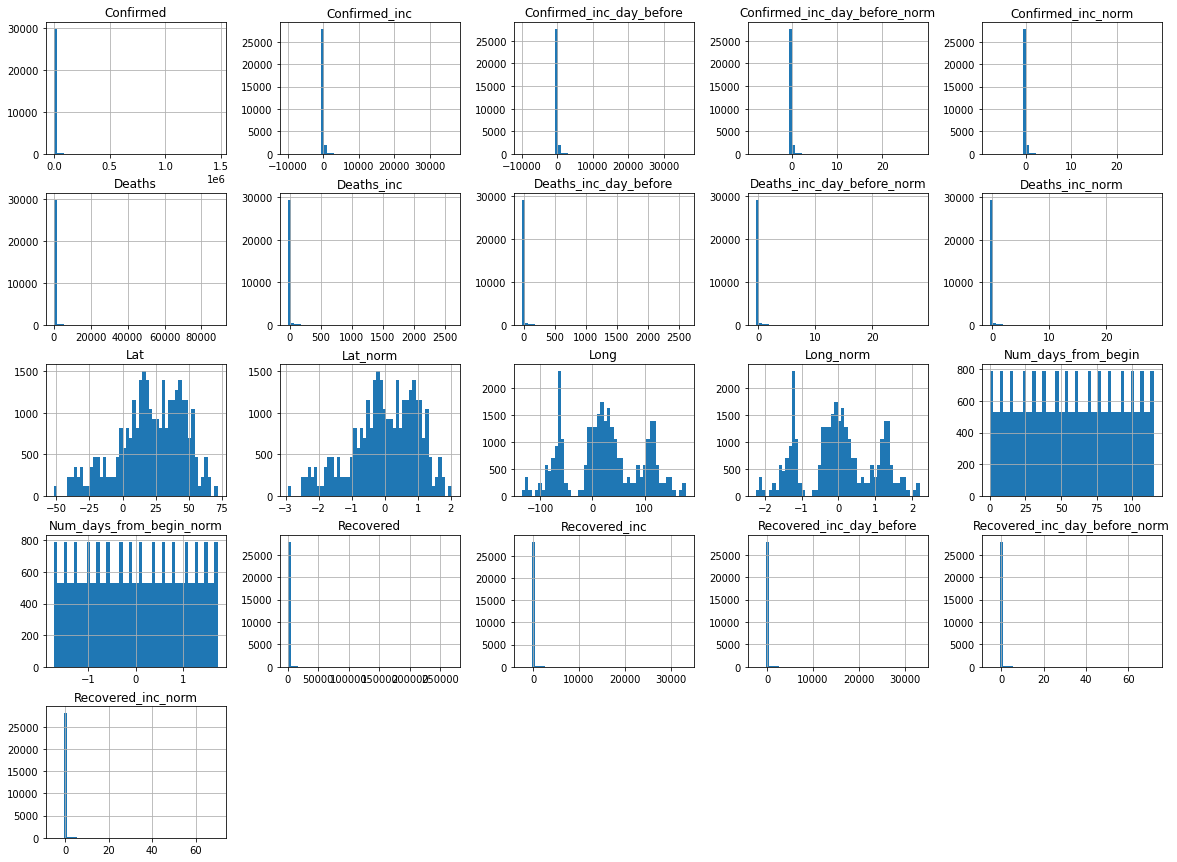

In [93]:
# compute the features's histograms
df.hist(bins=50, figsize=(20,15))

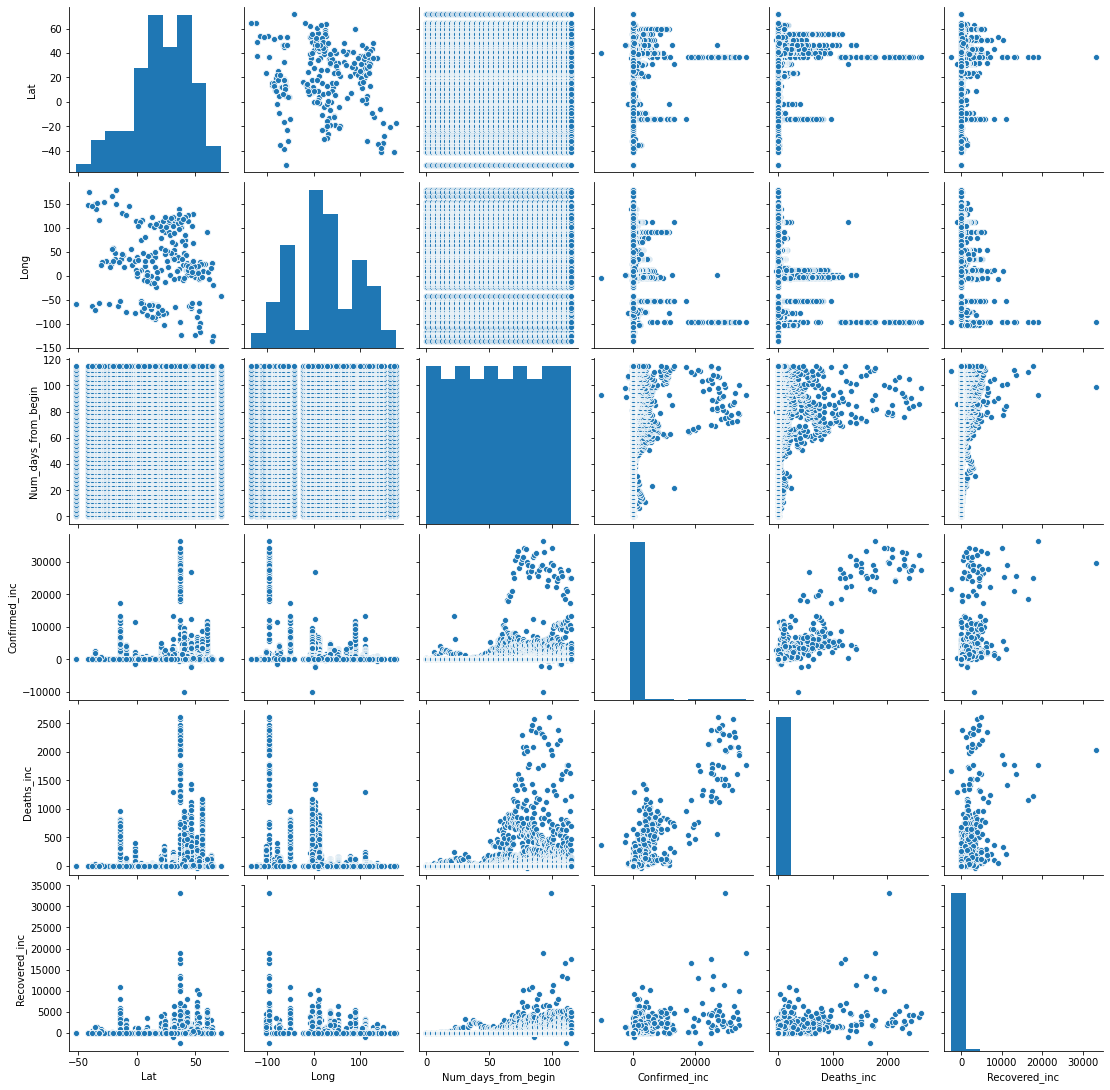

In [94]:
# compute pairplot again
sb.pairplot(df.loc[:, ["Lat", "Long", "Num_days_from_begin", "Confirmed_inc", "Deaths_inc", "Recovered_inc"]])

In [95]:
# check if all countries have information for all days (sanity check)
countries_with_dif_num_days = []

for country in df["Country/Region"].unique():
    num_dates_country = len(df.loc[df["Country/Region"] == country, "Date"].unique())
    if num_dates_country != total_days:
        countries_with_dif_num_days.append((country, num_dates_country))
        
countries_with_dif_num_days

[]

In [96]:
# rearrange column order
cols = ["Country/Region", "Lat", "Lat_norm", "Long", "Long_norm", "Date", "Num_days_from_begin", "Num_days_from_begin_norm", "Confirmed", "Deaths", "Recovered", "Confirmed_inc", "Confirmed_inc_norm", "Deaths_inc", "Deaths_inc_norm", "Recovered_inc", "Recovered_inc_norm"]
df = df[cols]
df

,Country/Region,Lat,Lat_norm,Long,Long_norm,Date,Num_days_from_begin,Num_days_from_begin_norm,Confirmed,Deaths,Recovered,Confirmed_inc,Confirmed_inc_norm,Deaths_inc,Deaths_inc_norm,Recovered_inc,Recovered_inc_norm
0,Afghanistan,33.0000,0.471083,65.0000,0.597360,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
1,Albania,41.1533,0.798304,20.1683,-0.039787,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
29116,Alberta (Canada),53.9333,1.311212,-116.5765,-1.983201,2020-01-22,0,-1.717183,0,0,NaN,0.0,-0.117725,0.0,-0.110666,NaN,NaN
2,Algeria,28.0339,0.271776,1.6596,-0.302833,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
3,Andorra,42.5063,0.852605,1.5218,-0.304791,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30623,Yukon (Canada),64.2823,1.726554,-135.0000,-2.245035,2020-05-16,115,1.717183,11,0,NaN,0.0,-0.117725,0.0,-0.110666,NaN,NaN
28186,Yunnan (China),24.9740,0.148971,101.4870,1.115912,2020-05-16,115,1.717183,185,2,183.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
21432,Zambia,-15.4167,-1.472053,28.2833,0.075543,2020-05-16,115,1.717183,679,7,183.0,25.0,-0.098276,0.0,-0.110666,59.0,0.003578
28187,Zhejiang (China),29.1832,0.317901,120.0934,1.380346,2020-05-16,115,1.717183,1268,1,1267.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130


In [98]:
# save processed dataframe to CSV file
df.to_csv('data/covid_19_world_processed.csv', index=False)